<a href="https://colab.research.google.com/github/FacundoBellone/AmigoSecreto.github.io/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [28]:
# Cálculo ingresos totales por tienda
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

resultado = pd.DataFrame(list(ingresos.items()), columns=["Tienda", "Ingreso Total"])

print(resultado)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


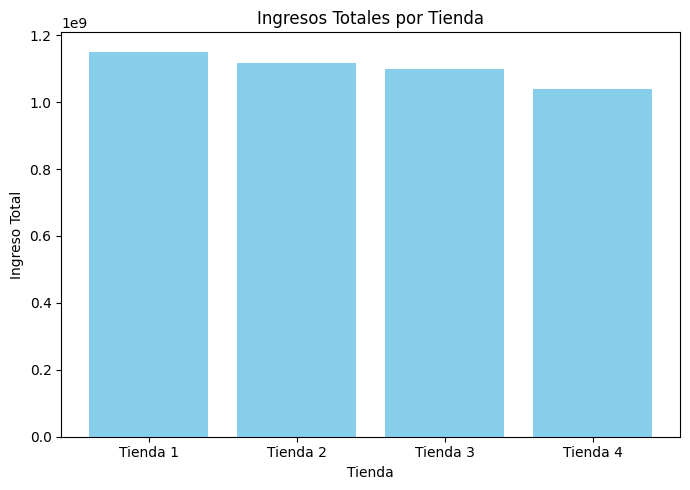

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(resultado["Tienda"], resultado["Ingreso Total"], color="skyblue")
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [30]:
# Cantidad de productos vendidos por categoría en cada tienda
categorias_tienda1 = tienda.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
categorias_tienda2 = tienda2.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
categorias_tienda3 = tienda3.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")
categorias_tienda4 = tienda4.groupby("Categoría del Producto")["Producto"].count().reset_index(name="Cantidad Vendida")

print("Tienda 1 - Categorías más populares:")
print(categorias_tienda1.sort_values(by="Cantidad Vendida", ascending=False), "\n")

print("Tienda 2 - Categorías más populares:")
print(categorias_tienda2.sort_values(by="Cantidad Vendida", ascending=False), "\n")

print("Tienda 3 - Categorías más populares:")
print(categorias_tienda3.sort_values(by="Cantidad Vendida", ascending=False), "\n")

print("Tienda 4 - Categorías más populares:")
print(categorias_tienda4.sort_values(by="Cantidad Vendida", ascending=False))




Tienda 1 - Categorías más populares:
    Categoría del Producto  Cantidad Vendida
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171 

Tienda 2 - Categorías más populares:
    Categoría del Producto  Cantidad Vendida
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181 

Tienda 3 - Categorías más populares:
    Categoría del Producto  Cantidad Vendida
7                  Muebles    

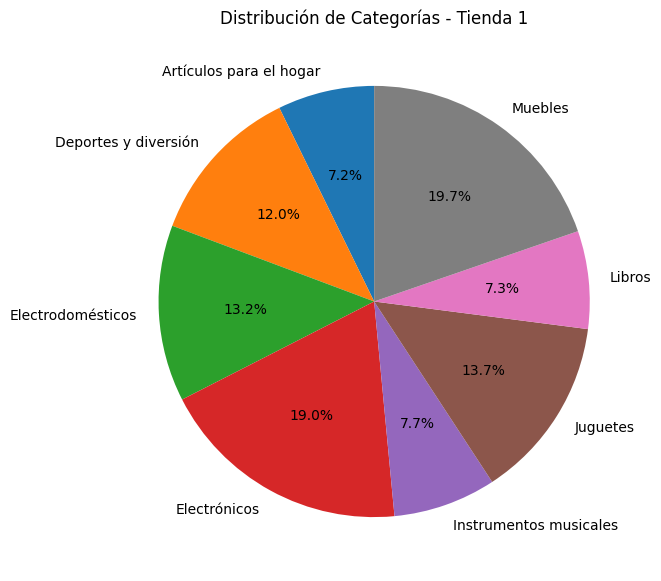

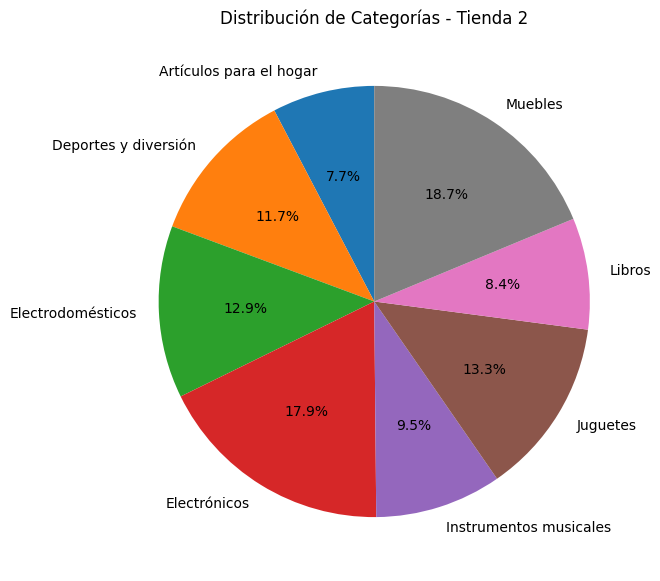

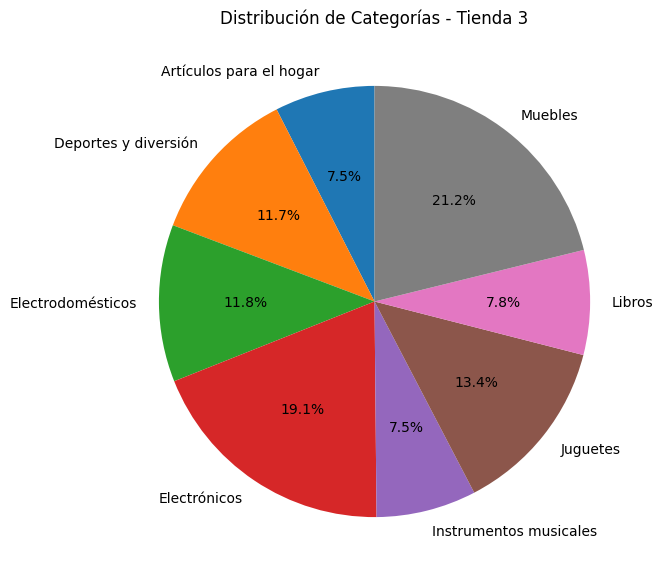

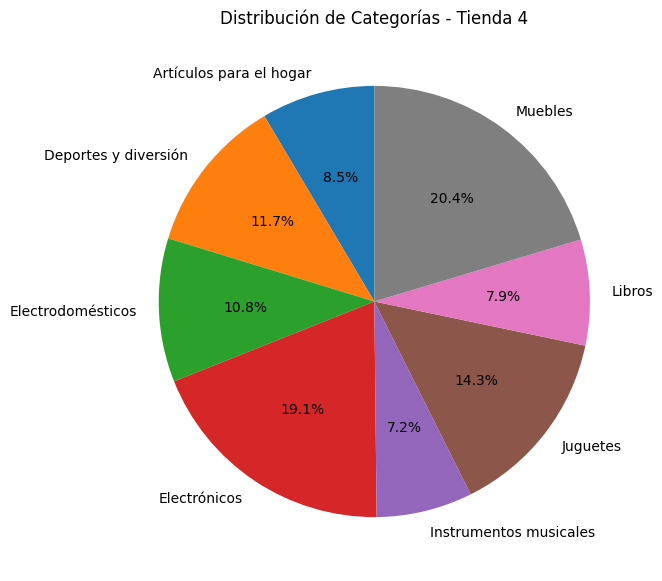

In [45]:
import matplotlib.pyplot as plt

tiendas_data = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for df, nombre in zip(tiendas_data, nombres_tiendas):
    categorias = df.groupby("Categoría del Producto")["Producto"].count()

    plt.figure(figsize=(7,7))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribución de Categorías - {nombre}")
    plt.show()


# 3. Calificación promedio de la tienda


In [32]:
# Calificaciones promedio de los clientes por tienda
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Convertir a DataFrame para visualizar
calificaciones_df = pd.DataFrame(list(calificaciones.items()), columns=["Tienda", "Calificación Promedio"])

print(calificaciones_df)


     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


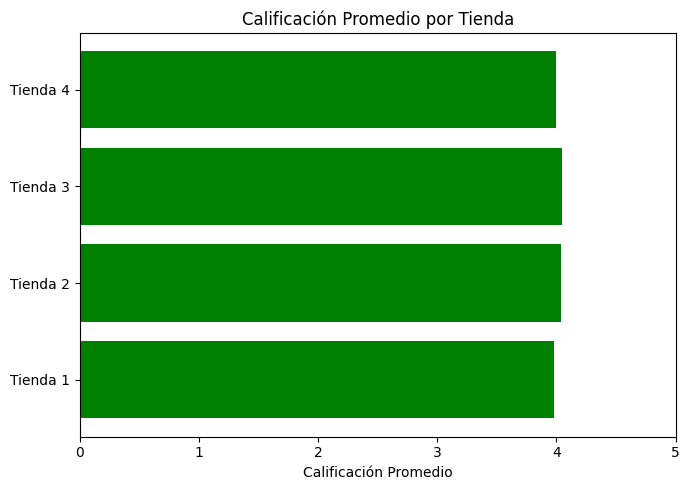

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.barh(calificaciones_df["Tienda"], calificaciones_df["Calificación Promedio"], color="green")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Calificación Promedio")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [48]:
def productos_mas_menos_vendidos(df, nombre_tienda):
    # Contar ventas por producto
    ventas = df.groupby("Producto").size().reset_index(name="Cantidad Vendida")

    # Producto más y menos vendido
    mas = ventas.loc[ventas["Cantidad Vendida"].idxmax()]
    menos = ventas.loc[ventas["Cantidad Vendida"].idxmin()]

    # Mostrar resultados
    print(f"\n{nombre_tienda}")
    print(f"Más vendido:   {mas['Producto']}  - {int(mas['Cantidad Vendida'])}")
    print(f"Menos vendido: {menos['Producto']} - {int(menos['Cantidad Vendida'])}")

# Ejecutar para cada tienda
productos_mas_menos_vendidos(tienda,  "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")



Tienda 1
Más vendido:   Armario  - 60
Menos vendido: Auriculares con micrófono - 33

Tienda 2
Más vendido:   Iniciando en programación  - 65
Menos vendido: Juego de mesa - 32

Tienda 3
Más vendido:   Kit de bancas  - 57
Menos vendido: Bloques de construcción - 35

Tienda 4
Más vendido:   Cama box  - 62
Menos vendido: Guitarra eléctrica - 33



Tienda 1
Top 5 más vendidos:
            Producto  Cantidad Vendida
1            Armario                60
48     TV LED UHD 4K                60
33        Microondas                60
40  Secadora de ropa                58
32     Mesa de noche                56

Top 5 menos vendidos:
                       Producto  Cantidad Vendida
4     Auriculares con micrófono                33
13                 Celular ABXY                33
37              Olla de presión                35
38                    Pandereta                36
14  Ciencia de datos con Python                39


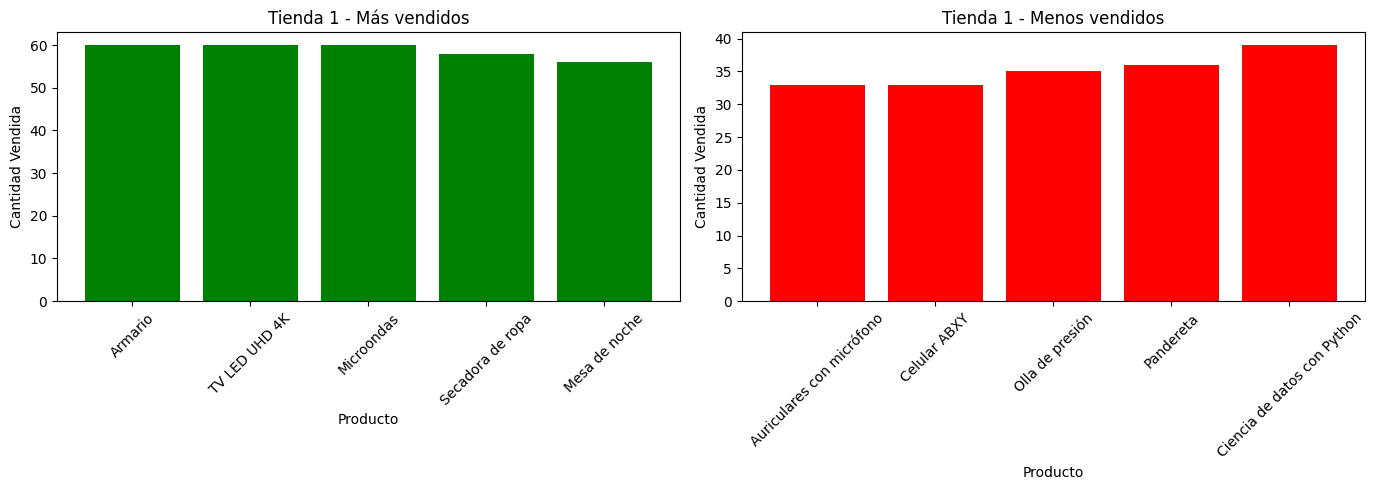


Tienda 2
Top 5 más vendidos:
                     Producto  Cantidad Vendida
24  Iniciando en programación                65
33                 Microondas                62
7                     Batería                61
38                  Pandereta                58
21          Guitarra acústica                58

Top 5 menos vendidos:
           Producto  Cantidad Vendida
26    Juego de mesa                32
23        Impresora                34
31  Mesa de comedor                34
44           Sillón                35
3       Auriculares                37


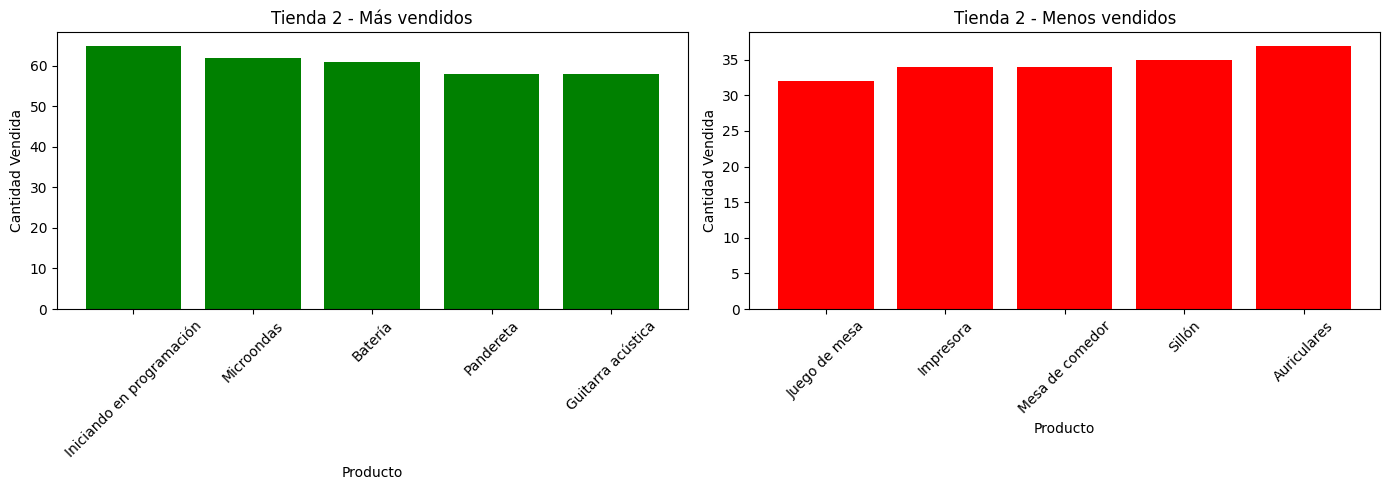


Tienda 3
Top 5 más vendidos:
           Producto  Cantidad Vendida
27    Kit de bancas                57
31  Mesa de comedor                56
11        Cama king                56
41     Set de ollas                55
32    Mesa de noche                55

Top 5 menos vendidos:
                   Producto  Cantidad Vendida
9   Bloques de construcción                35
42             Set de vasos                36
34                  Mochila                36
33               Microondas                36
50             Vaso térmico                38


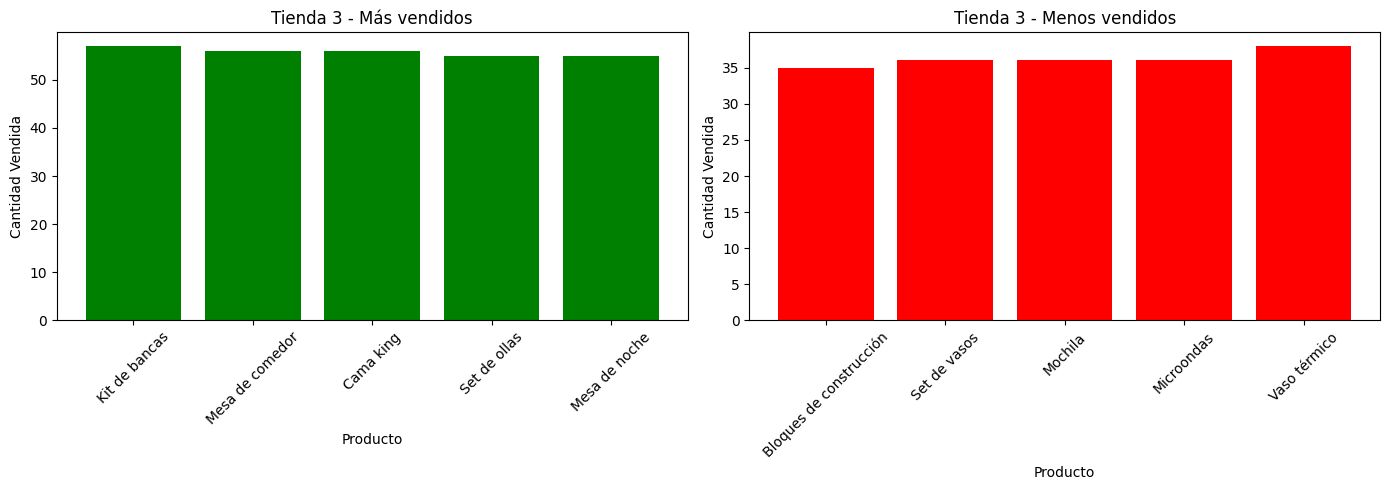


Tienda 4
Top 5 más vendidos:
                     Producto  Cantidad Vendida
10                   Cama box                62
15                 Cubertería                59
11                  Cama king                56
18    Dashboards con Power BI                56
12  Carrito de control remoto                55

Top 5 menos vendidos:
                       Producto  Cantidad Vendida
22           Guitarra eléctrica                33
1                       Armario                34
21            Guitarra acústica                37
14  Ciencia de datos con Python                38
28             Lavadora de ropa                38


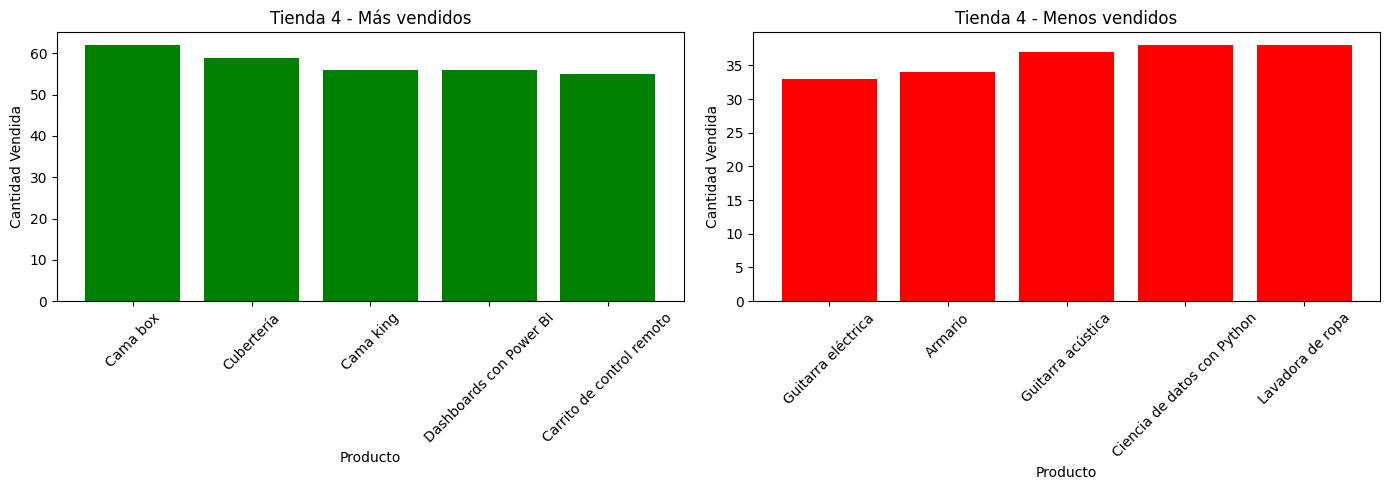

In [35]:
import matplotlib.pyplot as plt

def productos_mas_menos_vendidos(df, nombre_tienda):
    # Recuento de ventas por producto
    ventas = df.groupby("Producto").size().reset_index(name="Cantidad Vendida")

    # Top 5 más y menos vendidos
    top_mas = ventas.sort_values(by="Cantidad Vendida", ascending=False).head(5)
    top_menos = ventas.sort_values(by="Cantidad Vendida", ascending=True).head(5)

    print(f"\n{nombre_tienda}")
    print("Top 5 más vendidos:")
    print(top_mas)
    print("\nTop 5 menos vendidos:")
    print(top_menos)

    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # Más vendidos
    axes[0].bar(top_mas["Producto"], top_mas["Cantidad Vendida"], color="green")
    axes[0].set_title(f"{nombre_tienda} - Más vendidos")
    axes[0].set_xlabel("Producto")
    axes[0].set_ylabel("Cantidad Vendida")
    axes[0].tick_params(axis='x', rotation=45)

    # Menos vendidos
    axes[1].bar(top_menos["Producto"], top_menos["Cantidad Vendida"], color="red")
    axes[1].set_title(f"{nombre_tienda} - Menos vendidos")
    axes[1].set_xlabel("Producto")
    axes[1].set_ylabel("Cantidad Vendida")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

productos_mas_menos_vendidos(tienda,  "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")



# 5. Envío promedio por tienda

In [36]:
# Cálculo costo de envío promedio por tienda
costo_envio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Conversión a DataFrame para visualizar
costo_envio_df = pd.DataFrame(list(costo_envio.items()), columns=["Tienda", "Costo de Envío Promedio"])

print(costo_envio_df)


     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


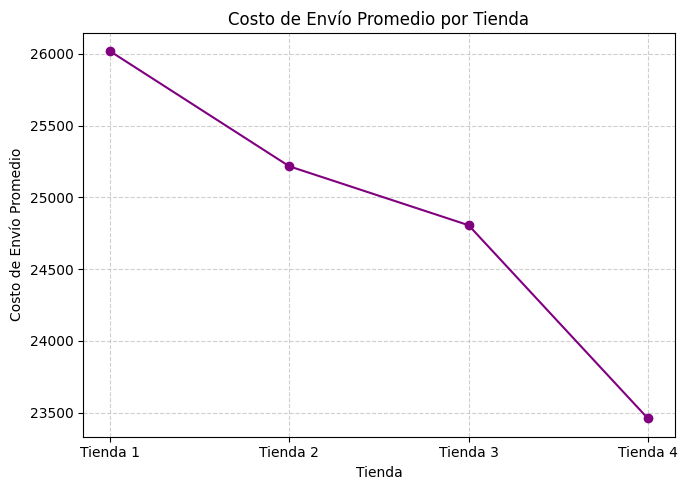

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(costo_envio_df["Tienda"], costo_envio_df["Costo de Envío Promedio"],
         marker="o", linestyle="-", color="purple")
plt.title("Costo de Envío Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
